In [21]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [8]:
df.columns = ['Sex','Length','Diameter','Height','Whole Weight','Shuckled Weight','Viscera Weight','Shell Weight','Rings']

In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4176 non-null   object 
 1   Length           4176 non-null   float64
 2   Diameter         4176 non-null   float64
 3   Height           4176 non-null   float64
 4   Whole Weight     4176 non-null   float64
 5   Shuckled Weight  4176 non-null   float64
 6   Viscera Weight   4176 non-null   float64
 7   Shell Weight     4176 non-null   float64
 8   Rings            4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [12]:
df.isnull().sum()

Sex                0
Length             0
Diameter           0
Height             0
Whole Weight       0
Shuckled Weight    0
Viscera Weight     0
Shell Weight       0
Rings              0
dtype: int64

In [14]:
df.shape

(4176, 9)

<Axes: xlabel='Rings'>

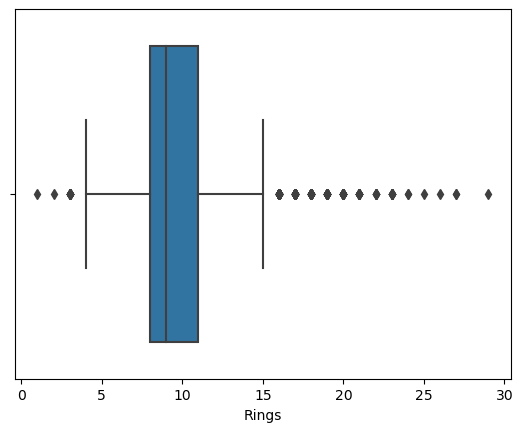

In [39]:
sns.boxplot(x = 'Rings', data=df)

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])

In [16]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight,Rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [18]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [19]:
X.head()

,Sex,Length,Diameter,Height,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [20]:
y.head()

0     7
1     9
2    10
3     7
4     8
Name: Rings, dtype: int64

In [22]:
#creating 10 different samples of dataset (70%-30%)
from sklearn.model_selection import train_test_split
samples=[]
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [26]:
samples[0]

(      Sex  Length  Diameter  Height  Whole Weight  Shuckled Weight  \
 1082    1   0.440     0.330   0.110        0.3705           0.1545   
 2518    1   0.505     0.390   0.185        0.6125           0.2670   
 801     2   0.425     0.330   0.130        0.4405           0.1520   
 4169    2   0.550     0.430   0.130        0.8395           0.3155   
 3695    2   0.650     0.525   0.205        1.4275           0.6900   
 ...   ...     ...       ...     ...           ...              ...   
 3451    0   0.555     0.440   0.145        0.8815           0.4300   
 662     0   0.380     0.305   0.105        0.2810           0.1045   
 3443    0   0.490     0.400   0.115        0.5690           0.2560   
 1847    1   0.475     0.340   0.105        0.4535           0.2030   
 2778    2   0.590     0.470   0.145        0.9235           0.4545   
 
       Viscera Weight  Shell Weight  
 1082          0.0840        0.1200  
 2518          0.1420        0.1720  
 801           0.0935        0.1

In [27]:
samples[1]

(      Sex  Length  Diameter  Height  Whole Weight  Shuckled Weight  \
 1113    1   0.525     0.400   0.140        0.6010           0.2625   
 894     1   0.255     0.190   0.050        0.0830           0.0295   
 494     0   0.625     0.500   0.150        0.9530           0.3445   
 1513    0   0.655     0.540   0.215        1.5555           0.6950   
 479     0   0.700     0.585   0.185        1.8075           0.7055   
 ...   ...     ...       ...     ...           ...              ...   
 1134    1   0.570     0.440   0.150        0.7550           0.3425   
 1937    2   0.625     0.505   0.185        1.1565           0.5200   
 3416    2   0.580     0.460   0.150        1.0165           0.4910   
 2908    0   0.580     0.450   0.150        0.9200           0.3930   
 3258    2   0.640     0.505   0.165        1.4435           0.6145   
 
       Viscera Weight  Shell Weight  
 1113          0.1285        0.1835  
 894           0.0215        0.0270  
 494           0.2235        0.3

In [29]:
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
final = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [30]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [31]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  final.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.27 Best Kernel =  rbf Best Nu =  9.88 Best Epsilon =  9.69
Best Accuracy =  0.27 Best Kernel =  linear Best Nu =  8.26 Best Epsilon =  9.67
Best Accuracy =  0.28 Best Kernel =  linear Best Nu =  5.03 Best Epsilon =  1.17
Best Accuracy =  0.27 Best Kernel =  rbf Best Nu =  5.98 Best Epsilon =  2.92
Best Accuracy =  0.26 Best Kernel =  rbf Best Nu =  5.56 Best Epsilon =  2.86
Best Accuracy =  0.27 Best Kernel =  linear Best Nu =  5.94 Best Epsilon =  10.0
Best Accuracy =  0.26 Best Kernel =  rbf Best Nu =  5.2 Best Epsilon =  6.42
Best Accuracy =  0.27 Best Kernel =  linear Best Nu =  6.35 Best Epsilon =  1.63
Best Accuracy =  0.26 Best Kernel =  rbf Best Nu =  8.36 Best Epsilon =  6.58
Best Accuracy =  0.28 Best Kernel =  rbf Best Nu =  0.91 Best Epsilon =  4.25


In [32]:
final

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.27,rbf,9.88,9.69
1,2,0.27,linear,8.26,9.67
2,3,0.28,linear,5.03,1.17
3,4,0.27,rbf,5.98,2.92
4,5,0.26,rbf,5.56,2.86
5,6,0.27,linear,5.94,10.00
6,7,0.26,rbf,5.20,6.42
7,8,0.27,linear,6.35,1.63
8,9,0.26,rbf,8.36,6.58
9,10,0.28,rbf,0.91,4.25


In [34]:
X_train, X_test, y_train, y_test = samples[final['Best Accuracy'].idxmax()]

In [35]:
k=final['Best Kernel'].iloc[final['Best Accuracy'].idxmax()]
c=final['Best Nu'].iloc[final['Best Accuracy'].idxmax()]
g=final['Best Epsilon'].iloc[final['Best Accuracy'].idxmax()]
svc=SVC(kernel=k, C=c, gamma=g, max_iter = 1000)
train_sizes, train_scores, test_scores = learning_curve(svc, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01, 1.0, 50))

In [36]:
mean_train = np.mean(train_scores, axis=1)
mean_test = np.mean(test_scores, axis=1) 

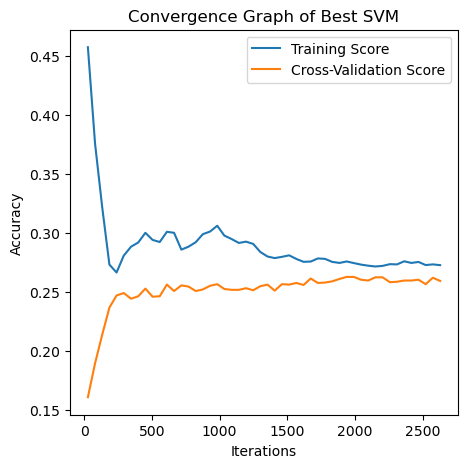

In [41]:
plt.figure(figsize=(5, 5))
#x_side=[i for i in range(1000)]
y_side=final['Best Accuracy']
plt.plot(train_sizes, mean_train, label='Training Score')
plt.plot(train_sizes, mean_test, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph of Best SVM')
plt.legend(loc="best")
plt.show()